<a href="https://www.kaggle.com/code/wailui/storytelling-top-athletes-earnings-by-sport?scriptVersionId=122930854" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center; padding: 5px;">
  <h1 style="color: #1E90FF;">⚽️Data Visualization & Storytelling-Top Athletes Earnings by Sport⚾️</h1>
    
   <h3 style="color: #6EB5FF;">
 Have you ever wondered about how much the top professional athletes make in a year? Well, you have the chance to dive deep into the fascinating data that reveals the earnings of the biggest names in sports.
          From basketball to golf, MMA to football, this dataset covers it all from 1990 to 2021. Get ready to explore the secrets with me now!
</h3>
    

  <img src="https://www.sportico.com/wp-content/uploads/2022/05/TOP_ATHELETES_1280x720_with_title_alt.png?w=1280&h=720&crop=1" alt="" style="width: 90%; padding-top: 10px;"/>
     
</div>

 <h2 style="color: #1E90FF;"> I'm going to show you: </h2>

#### 1. The Distribution of Earnings in different sports 
#### 2. The Highest 10 earning Sports in 2020
#### 3. Comparison of Total Earnings by Sport from 2018 to 2021
#### 4. Earnings by Basketball Athletes in Year 2021
#### 5. Earning Comparison among Basketball, Football and Golf

## Importing Relevant Data and Libraries:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/forbes-high-paid-athletes-19902021/forbesathletesv2.csv


In [2]:
df = pd.read_csv("../input/forbes-high-paid-athletes-19902021/forbesathletesv2.csv")
df.head(10)

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
5,Neymar,95.0,2021,Soccer
6,Roger Federer,90.0,2021,Tennis
7,Lewis Hamilton,82.0,2021,Racing
8,Tom Brady,76.0,2021,Football
9,Kevin Durant,75.0,2021,Basketball


## **Data Cleaning:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1659 non-null   object 
 1   Earnings  1659 non-null   float64
 2   Year      1659 non-null   int64  
 3   Sport     1659 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 52.0+ KB


In [4]:
df.describe

<bound method NDFrame.describe of                    Name  Earnings  Year               Sport
0        Conor McGregor     180.0  2021  Mixed Martial Arts
1          Lionel Messi     130.0  2021              Soccer
2     Cristiano Ronaldo     120.0  2021              Soccer
3          Dak Prescott     107.5  2021            Football
4          LeBron James      96.5  2021          Basketball
...                 ...       ...   ...                 ...
1654      Patrick Ewing       4.2  1990          Basketball
1655        Greg LeMond       4.2  1990             Cycling
1656     Gerhard Berger       4.0  1990              Racing
1657     Curtis Strange       3.8  1990                Golf
1658         Will Clark       3.8  1990            Baseball

[1659 rows x 4 columns]>

In [5]:
df.isnull().sum()

Name        0
Earnings    0
Year        0
Sport       0
dtype: int64

In [6]:
df.shape

(1659, 4)

In [7]:
df.drop_duplicates(inplace =True)
df.shape

(1659, 4)

In [8]:
df.columns

Index(['Name', 'Earnings', 'Year', 'Sport'], dtype='object')

In [9]:
df['Sport'].unique()

array(['Mixed Martial Arts', 'Soccer', 'Football', 'Basketball', 'Tennis',
       'Racing', 'Golf', 'Boxing', 'Baseball', 'Cricket', 'Track', 'MMA',
       'Cycling', 'Hockey', 'Football/Baseball'], dtype=object)

### **MMA stands for Mixed Martial Arts, so they're the same sport. Replacing MMA with Mixed Martial Arts in the Sport columns:**

In [10]:
df['Sport'] = df['Sport'].replace('MMA','Mixed Martial Arts')
df['Sport'].unique()

# Now MMA is replaced by Mixed Martial Arts
# But there's an abnormal column name Football/Baseball in the result

array(['Mixed Martial Arts', 'Soccer', 'Football', 'Basketball', 'Tennis',
       'Racing', 'Golf', 'Boxing', 'Baseball', 'Cricket', 'Track',
       'Cycling', 'Hockey', 'Football/Baseball'], dtype=object)

#### The abnormal column name ***Football/Baseball*** turns out from the athlete Deion Sanders.

#### ***Deion Sanders*** was a multi-sport athlete who played both baseball and football, but we don't have separate data on his earnings in each sport. To ensure to have a accurate picture for the whole dataset, I decided to remove his records.

https://en.wikipedia.org/wiki/Deion_Sanders

In [11]:
# Remove Football/Baseball and its relavent data from the dataset

dropped_df = df.drop(df.loc[df['Sport'] == 'Football/Baseball'].index)
dropped_df.head(5)

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball


In [12]:
# Removed 3 rows with Football/Baseball value
dropped_df.shape

(1656, 4)

In [13]:
# Save cleaned dataset to a new csv file
dropped_df.to_csv('cleaned_Highest_paid_athlete.csv')

## Data Visualization:

  <h2 style="color: #1E90FF;">1. The Distribution of Earnings in different sports </h2> 

#### The Distribution of Earnings by Sports gives us a full picture of the outlier, minimum, median, and maximum of earnings by different sports

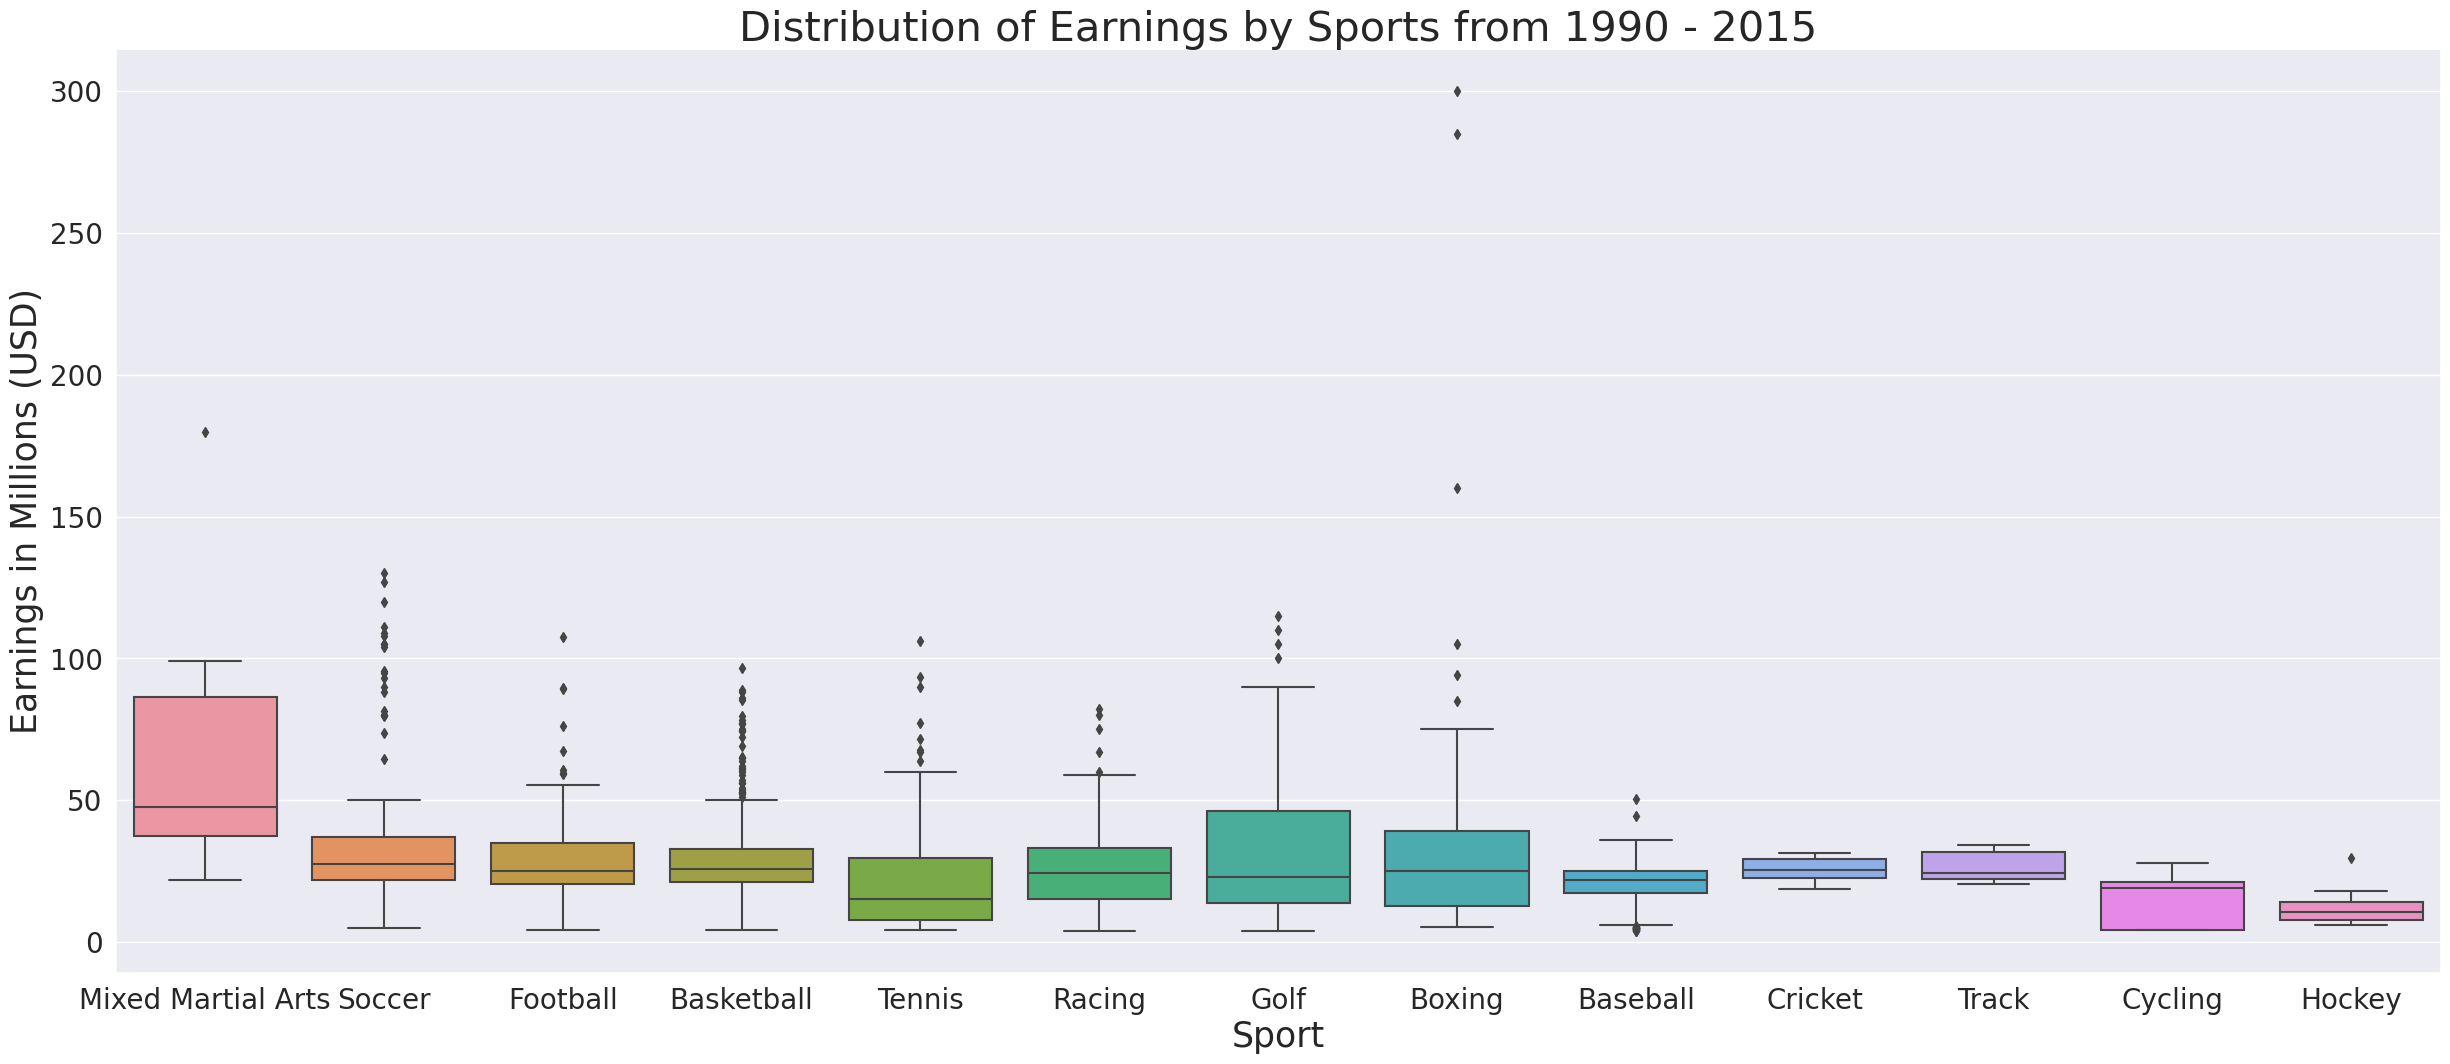

In [14]:
sns.set_style('whitegrid')

sns.set(rc = {'figure.figsize':(30,12)})        
sns.boxplot(x = 'Sport', y = 'Earnings', data = dropped_df)


plt.title('Distribution of Earnings by Sports from 1990 - 2015', fontsize = 30)
plt.xlabel('Sport', fontsize = 25 )
plt.ylabel('Earnings in Millions (USD)', fontsize = 25)

plt.tick_params(axis='both', which='major', labelsize=20)     # Setting the tick label size (the sport discipline names below in this boxplot)

plt.show()

<h3>From this boxplot, we can see that the sports with the highest median earnings are Mixed Martial Arts, the lowest median earnings are Tennis & Hockey. The other sports are pretty close. The dots are outliers earnings, which means they’re abnormally higher or lower than the norms, and it’s excluded in the highest and lowest earnings. 

We can see there are more outliers in Soccer, Basketball, and Tennis, which means some athletes in these sports earn significantly more or less than others. 

The extreme outlier in boxing, with earnings of over 300 million USD in year 2015, is Floyd Mayweather, who is known for his massive boxing paydays, particularly from his fights with Manny Pacquiao (pa·kyau), and the second high record is from his fight with Conor McGregor in 2018 of 285M.</h3>

In [15]:
df.nlargest(5, ['Earnings']).loc[dropped_df['Sport'] == 'Boxing']      
# The extreme outlier figure in Boxing was the record that Floyd Mayweather made in 2015

,Name,Earnings,Year,Sport
550,Floyd Mayweather,300.0,2015,Boxing
250,Floyd Mayweather,285.0,2018,Boxing
551,Manny Pacquiao,160.0,2015,Boxing


 <h2 style="color: #1E90FF;">Some times, we cannot see the whole story behind the data, so I did some research to figure out:</h2>

### Why do MMA fighters make more than athletes in other sports?

 - The popularity of MMA is rising, that increased demand and higher salaries for the top athletes.
 - The UFC has been doing biggest promotion of MMA and was acquired by ESPN for further increased revenue.
 - MMA creates more revenue by its viewership on TV networks.

Additionally, MMA is the fastest growing sport financially in the last five years, we will wait and see the trend in the future.

<h2 style="color: #1E90FF;">2. The Highest 10 earning Sports in 2020</h2> 

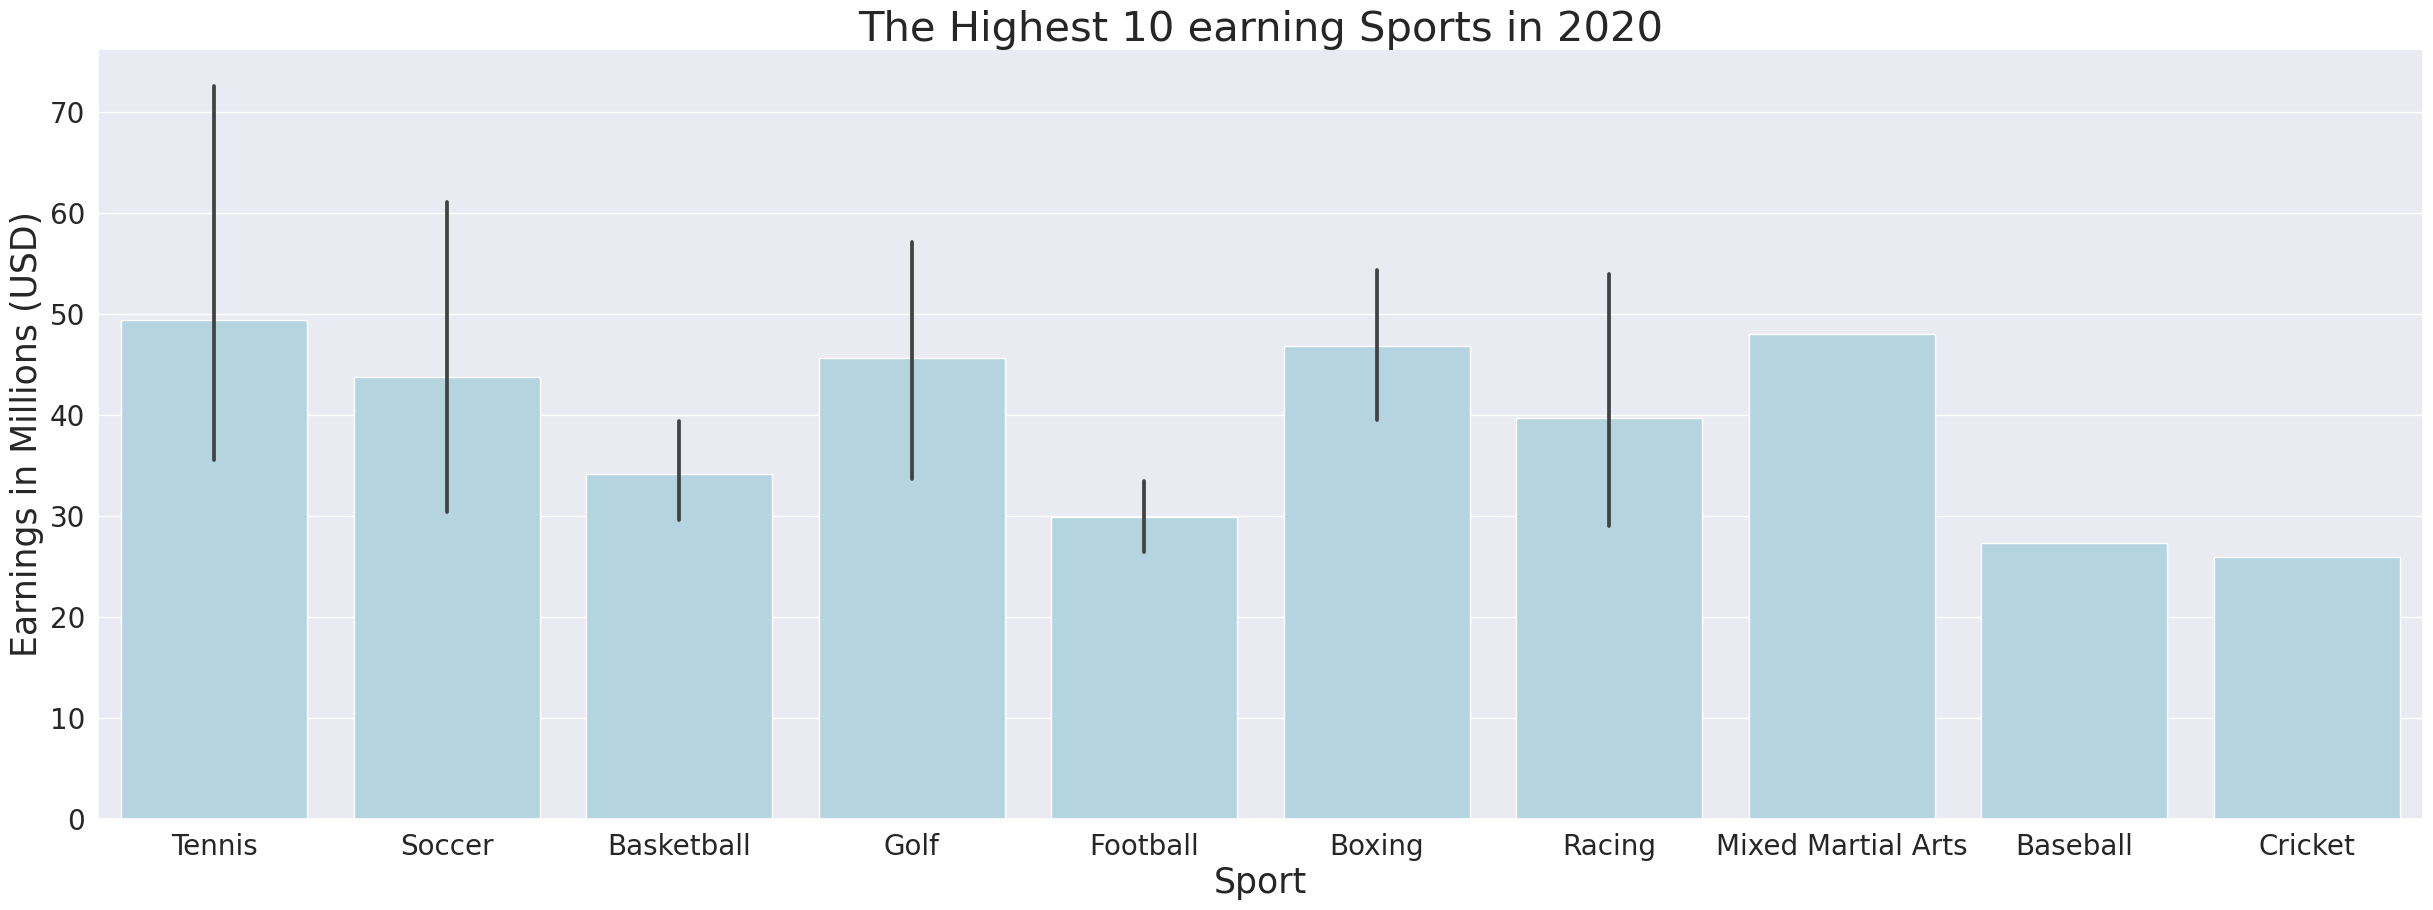

In [16]:
df_2020 = dropped_df[dropped_df['Year'] == 2020]

df_2020_top10 = df_2020.sort_values('Earnings',ascending=False)[:10]

plt.figure(figsize = (30,10))
sns.barplot(x = df_2020['Sport'], y = df_2020['Earnings'], color = 'lightblue')

plt.title('The Highest 10 earning Sports in 2020', fontsize = 30)
plt.xlabel('Sport', fontsize = 25 )
plt.ylabel('Earnings in Millions (USD)', fontsize = 25)

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)    

plt.show()


<h3>From this Barhplot, we can see in the year 2021, Football and Basketball were the highest-paid sports. Boxing athletes earned the least.

<h2 style="color: #1E90FF;">3.Comparison of Total Earnings by Sport from 2018 to 2021</h2> 

In [17]:
import plotly.graph_objs as go

df_2018 = df[df['Year'] == 2018].groupby('Sport').sum().sort_values('Earnings', ascending = False)
df_2019 = df[df['Year'] == 2019].groupby('Sport').sum().sort_values('Earnings', ascending = False)
df_2020 = df[df['Year'] == 2020].groupby('Sport').sum().sort_values('Earnings', ascending = False)
df_2021 = df[df['Year'] == 2021].groupby('Sport').sum().sort_values('Earnings', ascending = False)

fig = go.Figure()
fig.add_trace(go.Bar(x = df_2018.index, y = df_2018['Earnings'], name = '2018', marker = dict(color = 'dodgerblue')))
fig.add_trace(go.Bar(x = df_2019.index, y = df_2019['Earnings'], name = '2019', marker = dict(color = 'steelblue')))
fig.add_trace(go.Bar(x = df_2020.index, y = df_2020['Earnings'], name = '2020', marker = dict(color = 'cornflowerblue')))
fig.add_trace(go.Bar(x = df_2021.index, y = df_2021['Earnings'], name = '2021', marker = dict(color = 'lightblue')))

fig.update_layout(title = 'Comparison of Total Earnings by Sport from 2018 to 2021',
                  xaxis_title = 'Sport',
                  yaxis_title = 'Earnings',
                  title_font_size = 30,
                  xaxis = dict(title_font_size = 25),
                  yaxis = dict(title_font_size = 25))

fig.show()


<h3> From this chart, we can see the comparison of total earnings by sport for the year between 2018 and 2021. It shows that some sports, such as basketball and golf, consistently have high earnings over the years, while others are not.</h3>

<h3> The graphy also shows the impact of the COVID-19 pandemic on the sports industry, with a decrease in earnings for many sports in 2020, followed by a rebound in 2021.</h3>

<h2 style="color: #1E90FF;"> 4. Earnings by Basketball Athletes in Year 2021: </h2>

In [18]:
# Filter the records of baskeball athletes in year 2021

basketball_2021 = dropped_df[(dropped_df['Sport'] == 'Basketball') & (dropped_df['Year'].isin([2021]))]
basketball_2021.head(2)

,Name,Earnings,Year,Sport
4,LeBron James,96.5,2021,Basketball
9,Kevin Durant,75.0,2021,Basketball


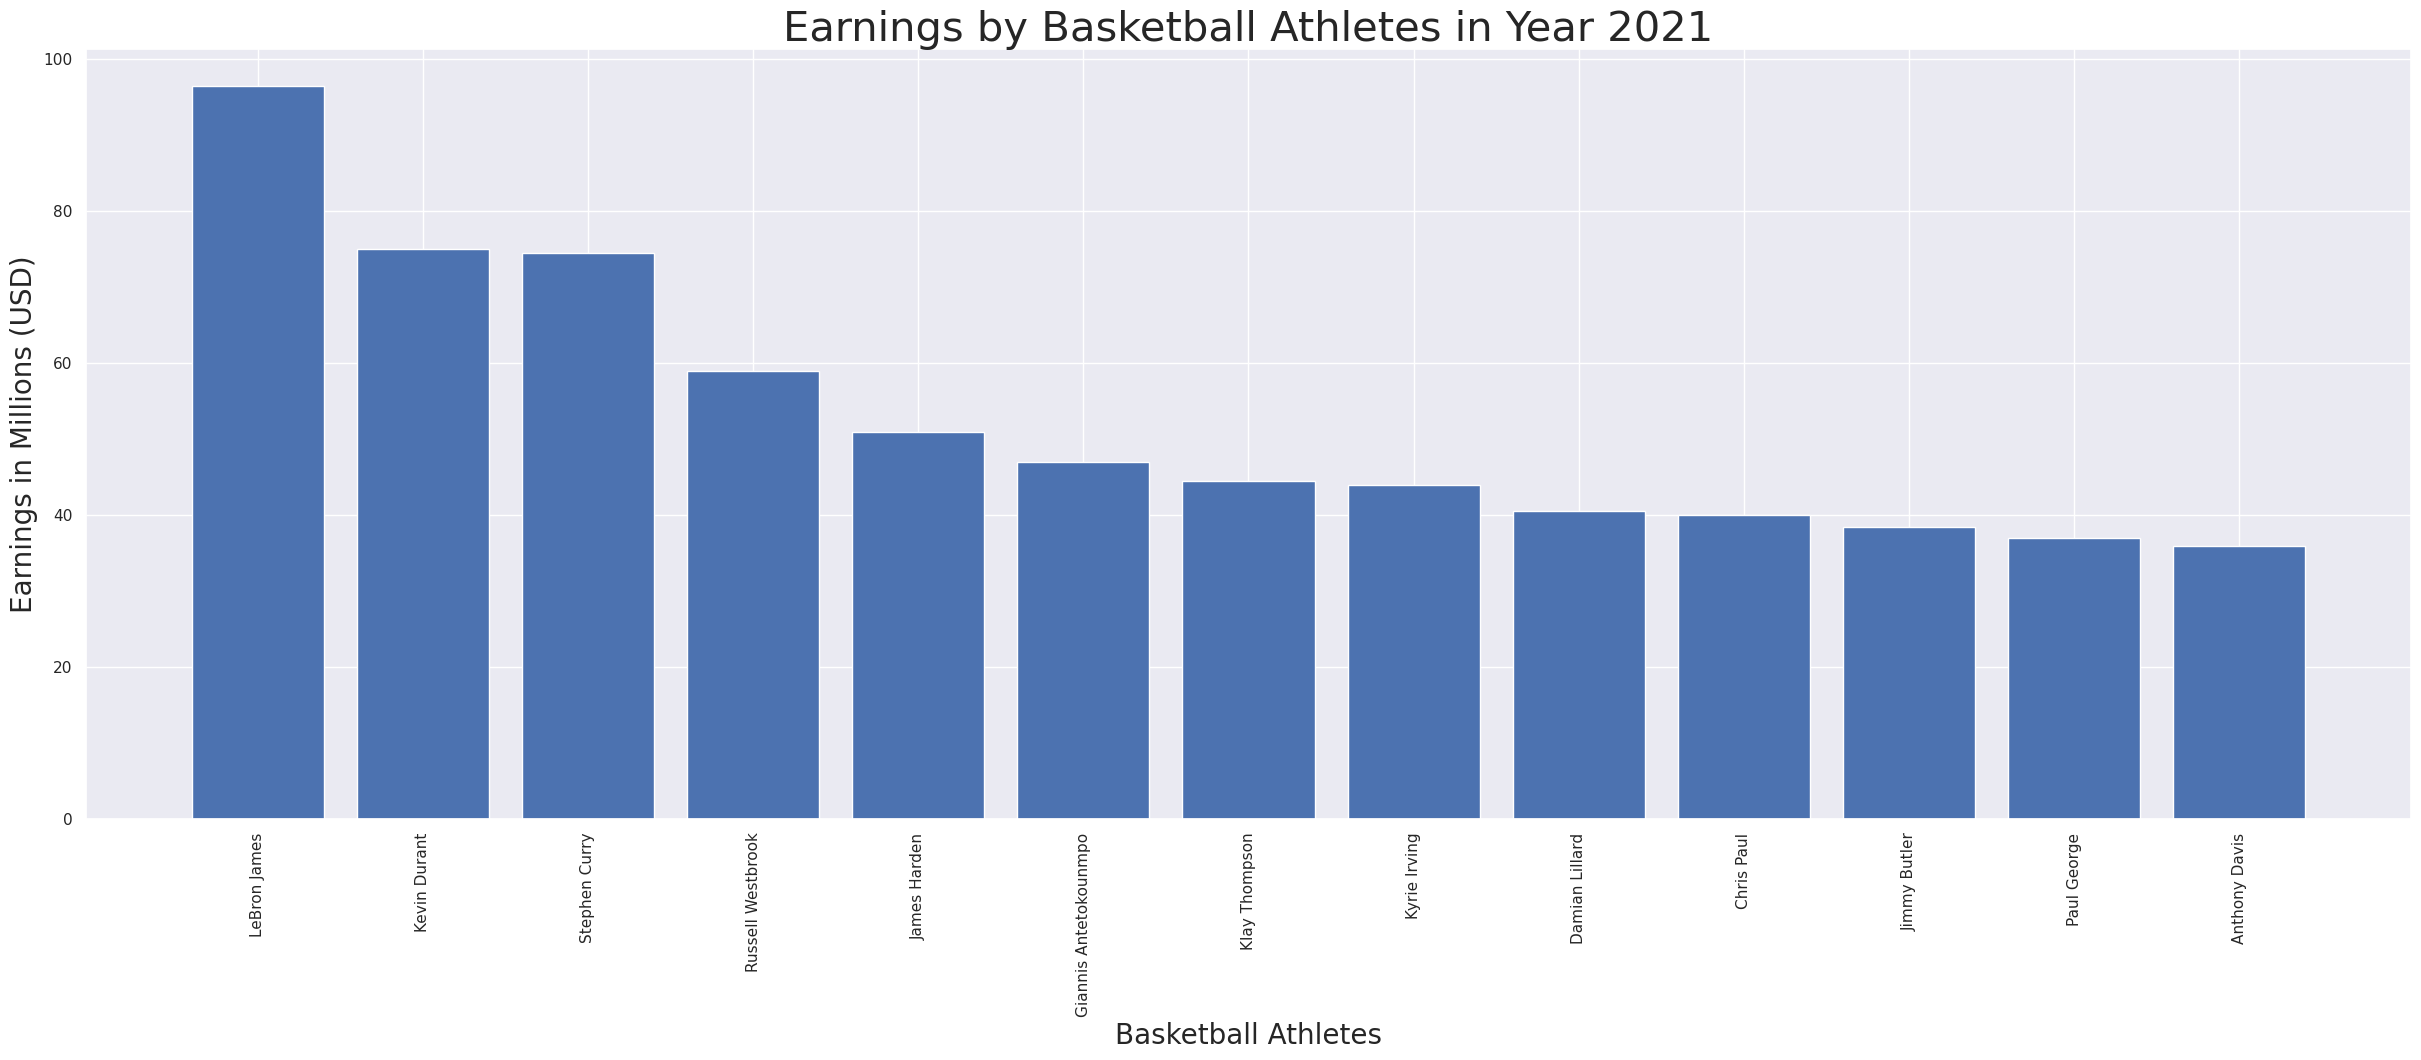

In [19]:
earnings_by_name = basketball_2021.groupby('Name')['Earnings'].sum()   # Get the sum of earning by grouping names

earnings_by_name = earnings_by_name.sort_values(ascending = False)  # Sort earnings in descending order

# Bar chart 
fig, ax = plt.subplots(figsize=(30, 10))

ax.bar(earnings_by_name.index, earnings_by_name.values)

ax.set_title('Earnings by Basketball Athletes in Year 2021', fontsize = 30)
ax.set_xlabel('Basketball Athletes', fontsize = 20)
ax.set_ylabel('Earnings in Millions (USD)', fontsize = 20)

plt.xticks(rotation = 90)  # Rotate the x-axis labels

plt.show()

<h3> From this Bar plot, we can see in year 2021, LeBron James was the highest-paid basketball player, earning almost three times more than Anthony Davis, who was the 10th highest-paid NBA player. </h3>

<h2 style="color: #1E90FF;"> 5. Earning Comparison among Basketball, Football and Golf: </h2> 

In [20]:
# The method isin() filters the rows only where the 'Sport' contains a value from the list 'sports_list' 

sports_list = ['Basketball', 'Football', 'Golf']                                 # Create a list for these sports for filtering
filtered_dropped_df = dropped_df[dropped_df['Sport'].isin(sports_list)]  

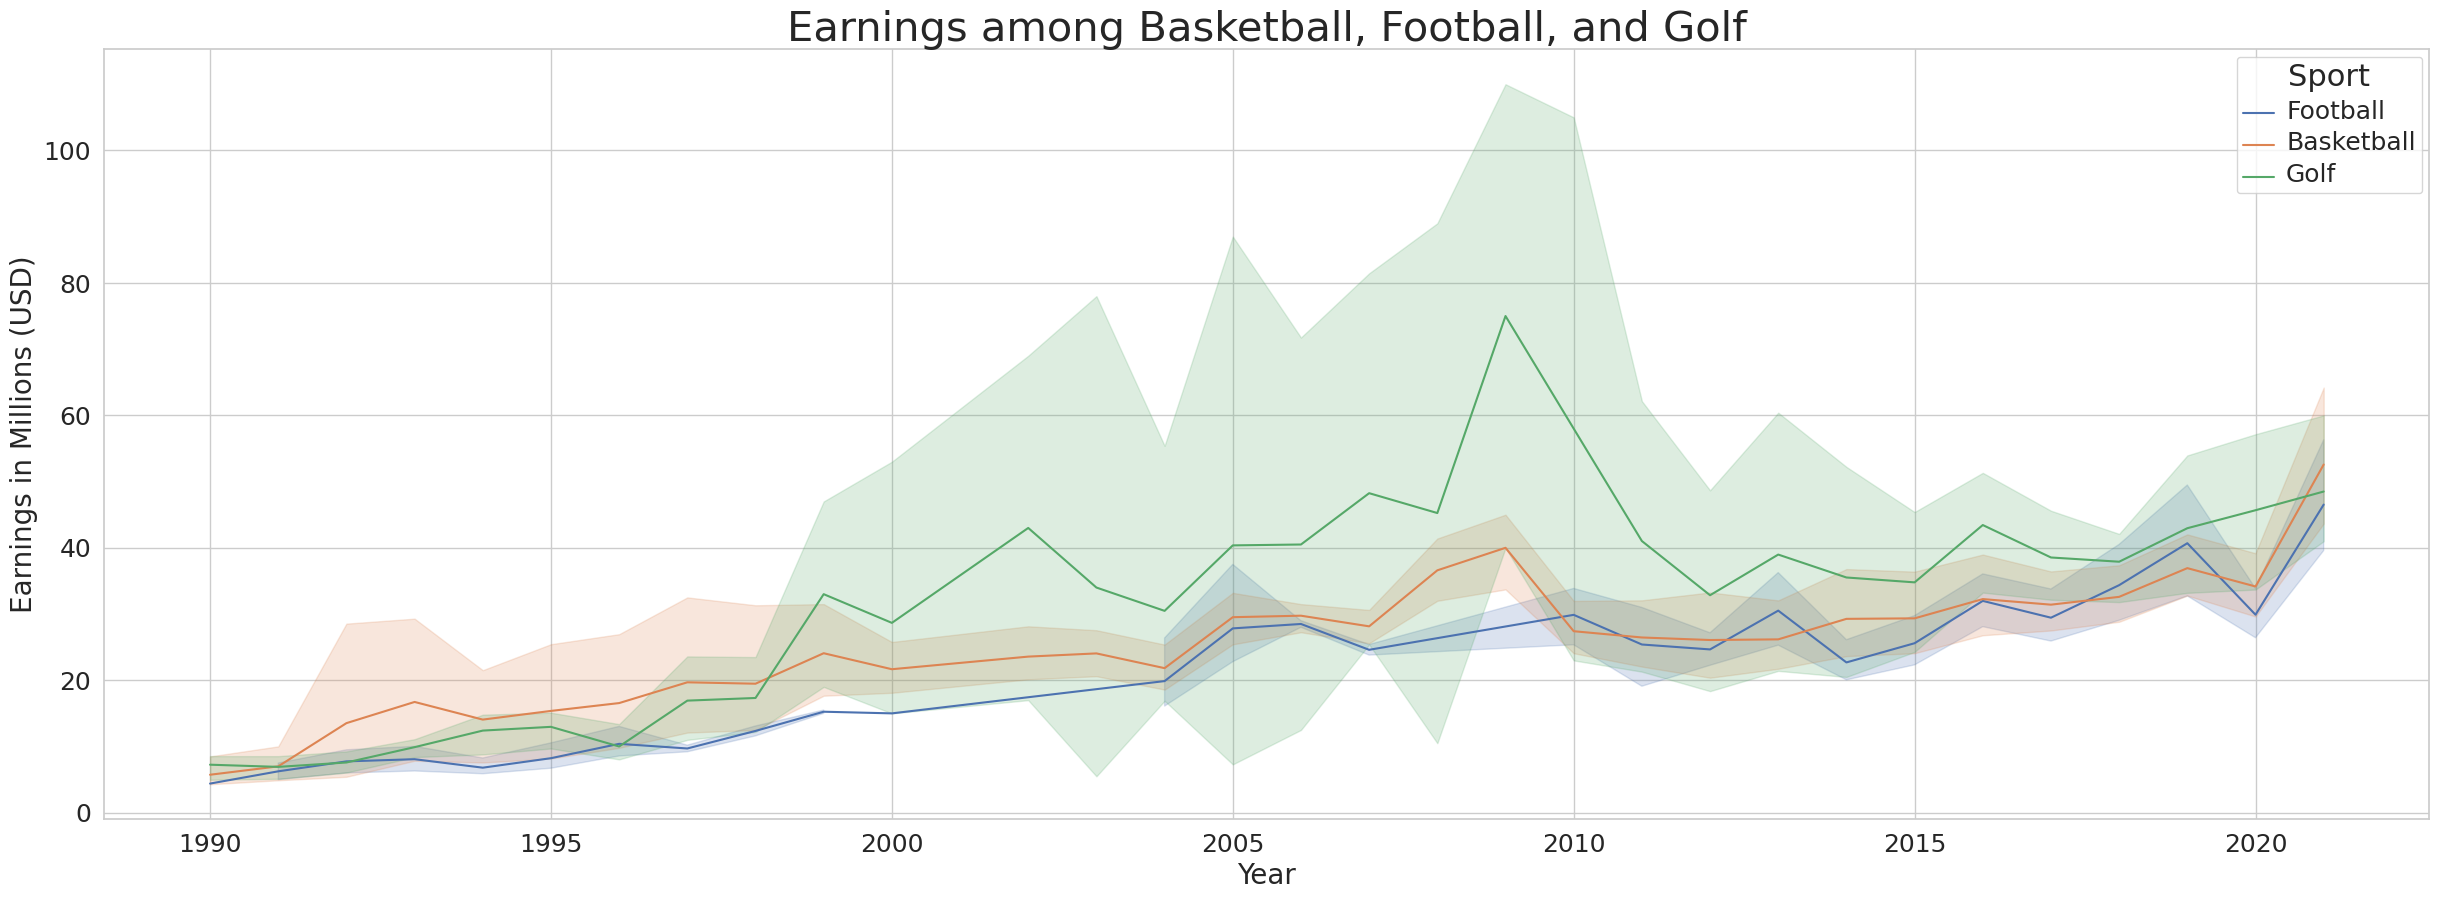

In [21]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(30, 10))

plt.title('Earnings among Basketball, Football, and Golf', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Earnings in Millions (USD)', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 15)

ax = sns.lineplot(data = filtered_dropped_df, x = 'Year', y = 'Earnings', hue = 'Sport')  # Creating an Axes Object

plt.setp(ax.get_legend().get_texts(), fontsize = '18') # to set legend text
plt.setp(ax.get_legend().get_title(), fontsize = '22') # to set legend title

plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

<h3>From this line chart, between the year 1990 and 2021, we can see the trend of the total earnings of asketball, Football and Golf over the years. It seems that Golf has the highest total earnings, followed by Basketball, and then Football.</h3>
    
<h3>The line chart also shows that all three sports experienced some fluctuations in earnings over the years. Golf had a particularly significant dip in earnings in 2012. However, all three sports seem to have recovered and continue to grow in terms of total earnings.</h3>